# Algorithm Design
## Chapter 3 - Divide and Conquer

Required python packages:

- numpy
- matplotlib

In [2]:
try:
    from algo_helper import * 
except: # try to fetch utils functions from URL
    import urllib.request as request; exec(request.urlopen('https://perso.esiee.fr/~perretb/AlgorithmDesign/algo_helper.py').read(), globals())

### Merge sort

**Implement the merging of two sorted arrays in linear time.**

The result must be sorted.

The unit test must says that your function seems correct.

In [3]:
def merge_sorted_arrays(array1, array2):
  # array1 and array2 are two sorted arrays
  # merge array1 and array2 in a new sorted array and return it
  merged_array = []
  i, j = 0, 0

  while i < len(array1) and j < len(array2):
    if array1[i] < array2[j]:
      merged_array.append(array1[i])
      i += 1
    else:
      merged_array.append(array2[j])
      j += 1

  # Append remaining elements of array1
  while i < len(array1):
    merged_array.append(array1[i])
    i += 1

  # Append remaining elements of array2
  while j < len(array2):
    merged_array.append(array2[j])
    j += 1

  return merged_array

test_merge_sorted_arrays(merge_sorted_arrays);

--- Running test: 
✔  merge_sorted_arrays([], []) -> []
✔  merge_sorted_arrays([1, 2], []) -> [1, 2]
✔  merge_sorted_arrays([], [1, 2]) -> [1, 2]
✔  merge_sorted_arrays([1, 3], [2, 4]) -> [1, 2, 3, 4]
✔  merge_sorted_arrays([1, 2, 3], [1]) -> [1, 1, 2, 3]
✔  merge_sorted_arrays([1], [1, 2, 3]) -> [1, 1, 2, 3]
✔ 6/6 tests passed.
--- Test finished.


**Implement merge sort.**

The unit test must says that your function seems correct.

In [4]:
def merge_sort(array):
  if len(array) <= 1:
    return array

  mid = len(array) // 2
  left_half = merge_sort(array[:mid])
  right_half = merge_sort(array[mid:])

  return merge_sorted_arrays(left_half, right_half)

unit_test_sort(merge_sort, inplace=False);

--- Running test: 
✔  merge_sort([0.55 0.72 0.6  0.54 0.42 0.65 0.44 0.89 0.96 0.38]) -> [0.38 0.42 0.44 0.54 0.55 0.6  0.65 0.72 0.89 0.96]
✔  merge_sort([0.29 0.45 0.83 0.83 0.93 0.07 0.42 0.71 0.26 0.15]) -> [0.07 0.15 0.26 0.29 0.42 0.45 0.71 0.83 0.83 0.93]
✔  merge_sort([0.88 0.28 0.08 0.63 0.75 0.02 0.92 0.46 0.68 0.99]) -> [0.02 0.08 0.28 0.46 0.63 0.68 0.75 0.88 0.92 0.99]
✔  merge_sort([0.42 0.17 0.73 0.88 1.   0.59 0.14 0.26 0.36 0.2 ]) -> [0.14 0.17 0.2  0.26 0.36 0.42 0.59 0.73 0.88 1.  ]
✔  merge_sort([0.16 0.76 0.4  0.8  0.44 0.76 0.22 0.51 0.68 0.19]) -> [0.16 0.19 0.22 0.4  0.44 0.51 0.68 0.76 0.76 0.8 ]
✔ 5/5 tests passed.
--- Test finished.


Now let's verify that the runtime of the implemented algorithm matches the expected runtime complexity.

We are going to run the implemented algorithm on three kind of inputs of various sizes:

- already sorted arrays
- reverse sorted arrays
- random arrays

**What is the best and worst case time complexity of the algorithm?**

**Does the execution runtime of the implementation matches with those theoretical runtime complexities?**

--- Running runtime test for 'merge_sort':
	 - Input is a sorted array:
		array size: 1,024 -> time 2.166 s
		array size: 2,048 -> time 3.282 s
		array size: 4,096 -> time 13.253 s
		array size: 8,192 -> time 17.281 s
		array size: 16,384 -> time 33.013 s
		array size: 32,768 -> time 74.104 s
		array size: 65,536 -> time 155.262 s
		array size: 131,072 -> time 326.758 s
	 - Input is a reverse sorted array:
		array size: 1,024 -> time 0.000 s
		array size: 2,048 -> time 5.208 s
		array size: 4,096 -> time 5.221 s
		array size: 8,192 -> time 20.419 s
		array size: 16,384 -> time 35.186 s
		array size: 32,768 -> time 74.668 s
		array size: 65,536 -> time 157.407 s
		array size: 131,072 -> time 340.235 s
	 - Input is a random array:
		array size: 1,024 -> time 2.108 s
		array size: 2,048 -> time 3.986 s
		array size: 4,096 -> time 10.538 s
		array size: 8,192 -> time 21.202 s
		array size: 16,384 -> time 44.166 s
		array size: 32,768 -> time 98.747 s
		array size: 65,536 -> time 199.973 s


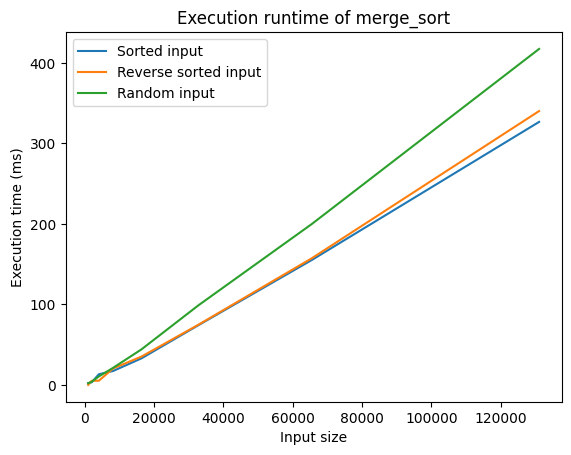

In [5]:
runtime_test_sort(merge_sort, [2**i for i in range(10, 18)])

### Quick sort

**Implement the reorder step in the following function.**

Reordering must be done in place: the result must be in the input, you must not allocate a new array, the function returns nothing.

The unit test must says that your function seems correct.

In [55]:
def test_reorder_array(fun):

    import numpy as np
    np.random.seed(0)
    unitTest = UnitTestImmediate()
    unitTest.start()

    for i in range(200):
        array = np.random.randint(0, 100, size=(200,))
        pivot = array[0]
    
        i = fun(array)
        
        unitTest.assert_true(lambda : i is not None and array[i] == pivot, "Reorder array does not work: the pivot index is incorrect", "reorder_array")
        unitTest.assert_true(lambda : np.all(array[:i] <= pivot), "Reorder array does not work, some elements before the pivot are greater than the pivot.", "reorder_array")
        unitTest.assert_true(lambda : np.all(array[i:] >= pivot), "Reorder array does not work, some elements after the pivot are smaller than the pivot.", "reorder_array")

    unitTest.end()

In [56]:
def reorder_array(array, start=None, stop=None):
    # -reorder the element in the sub-array array[start:stop]
    # -the pivot is the first element of the sub-array
    # -reorder the sub-array such that all the elements smaller than the pivot are before the pivot and conversly
    # -return the position of the pivot at the end of the function

    if start is None:
        start = 0
    if stop is None:
        stop = len(array) - 1

    pivot = array[start]  # pivot is the first element of the array
    k = stop
    
    for i in range(stop, start, -1):
        if array[i] > pivot:
            array[i], array[k] = array[k], array[i]
            k -= 1
    
    array[k], array[start] = array[start], array[k]

    print("pivot", pivot)
    print("k", k)
    print("pivot", array[k])
    print(array[start:k])
    print(array[k:stop])
    print(array)
    
    return k    

reorder_array([7, 6, 10, 5, 9, 2, 1, 15, 7], 0, 8)

test_reorder_array(reorder_array);

pivot 7
k 5
pivot 7
[2, 6, 1, 5, 7]
[7, 10, 9]
[2, 6, 1, 5, 7, 7, 10, 9, 15]
--- Running test: 
pivot 44
k 91
pivot 44
[15 20 29 19 23  9 36 21 36 13 10 11 43 12 11 41 39 35  2 21 26 37 25 32
  0  9 20 25 36 34  0 38  3 19 42 33 29 19 19 14 39 32 21  9 42 32 31  0
 23 35 10 43 28 34  0  0 36 32  5 38 17 23  4 42 16 31  1  2 41 14 35 11
 30 35 24  0 14  2  3 12 42 24  4 20  6 13 40  3 27 14 41]
[44 47 64 67 67 83 87 70 88 88 58 65 87 46 88 81 77 72 80 69 79 47 64 82
 99 88 49 65 57 74 75 55 53 79 58 65 57 46 82 91 99 53 84 75 68 68 47 76
 52 78 99 58 79 85 48 49 69 64 95 69 94 50 48 93 98 77 73 58 59 98 62 94
 67 82 46 99 81 50 58 65 86 51 80 54 46 56 60 77 94 98 72 95 72 66 52 67
 61 96 67 86 77 75 56 80 60 61 83 70]
[15 20 29 19 23  9 36 21 36 13 10 11 43 12 11 41 39 35  2 21 26 37 25 32
  0  9 20 25 36 34  0 38  3 19 42 33 29 19 19 14 39 32 21  9 42 32 31  0
 23 35 10 43 28 34  0  0 36 32  5 38 17 23  4 42 16 31  1  2 41 14 35 11
 30 35 24  0 14  2  3 12 42 24  4 20  6 13 40  3 27 14

**Implement quick sort in the following function.**

The sorting must be done in place: the result must be in the input, you must not allocate a new array, the function returns nothing.

The unit test must says that your function seems correct.

In [ ]:
def quick_sort(array, start=None, stop=None):
    # sort the given sub-array array[start:stop] with quick-sort algorithm

    if start is None:
        start = 0
    if stop is None:
        stop = len(array)

    ########################
    #
    # Your code here !
    #
    ########################
    pass

unit_test_sort(quick_sort, inplace=True);

Now let's verify that the runtime of the implemented algorithm matches the expected runtime complexity.

We are going to run the implemented algorithm on three kind of inputs of various sizes:

- already sorted arrays
- reverse sorted arrays
- random arrays

**What is the best and worst case time complexity of the algorithm?**

**Does the execution runtime of the implementation matches with those theoretical runtime complexities?**

In [ ]:
runtime_test_sort(quick_sort, [256*i for i in range(1, 9)])

### Matrix multiplication

**Implement the naive matrix multiplication algorithm.**

The unit test must says that your function seems correct.

In [ ]:
def naive_matrix_mulplication(A, B):
    """
    O(n^3) naive square matrix mutiplication
    """
    import numpy as np
    res = np.zeros_like(A)

    ########################
    #
    # Your code here !    
    #
    ########################
    return res

unit_test_square_matrix_multiplication(naive_matrix_mulplication);

**Implement the Strassen matrix multiplication algorithm.**

The unit test must says that your function seems correct.

In [ ]:
def strassen_matrix_mulplication(A, B):
  """
  Strassen's square matrix mutiplication
  Assume that the size of A and B is n*n with n=2^k
  """
  import numpy as np
  res = np.zeros_like(A)

  ########################
  #
  # Your code here !    
  #
  ########################

  return res

unit_test_square_matrix_multiplication(strassen_matrix_mulplication);